# GeoPandas Visualization - State-wise Silver Purchases

This notebook demonstrates how to visualize state-wise silver purchases using GeoPandas

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import requests

## Load Silver Purchase Data

In [3]:
df_silver = pd.read_csv('state_wise_silver_purchased_kg.csv')
print(f"Total states: {len(df_silver)}")
df_silver.head()

Total states: 31


,State,Silver_Purchased_kg
0,Andhra Pradesh,18500
1,Arunachal Pradesh,420
2,Assam,950
3,Bihar,7800
4,Chhattisgarh,5200


## Load India States GeoJSON

In [4]:
geojson_url = "https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson"

response = requests.get(geojson_url)
india_states_geojson = response.json()

india_gdf = gpd.GeoDataFrame.from_features(india_states_geojson['features'])
print(f"Total geographic features: {len(india_gdf)}")
india_gdf.head()

Total geographic features: 36


,geometry,ST_NM
0,"POLYGON ((95.23392 26.68246, 95.23282 26.70579...",Arunachal Pradesh
1,"POLYGON ((95.19465 27.03132, 95.15008 26.99934...",Assam
2,"POLYGON ((76.83806 30.75487, 76.83301 30.73887...",Chandigarh
3,"POLYGON ((77.55144 18.29191, 77.57026 18.29252...",Karnataka
4,"POLYGON ((94.67545 25.44561, 94.67293 25.42398...",Manipur


## Merge Geographic Data with Silver Purchase Data

In [5]:
india_merged = india_gdf.merge(df_silver, left_on='ST_NM', right_on='State', how='left')
india_merged['Silver_Purchased_kg'] = india_merged['Silver_Purchased_kg'].fillna(0)

print(f"Merged data shape: {india_merged.shape}")
india_merged[['ST_NM', 'Silver_Purchased_kg']].head(10)

Merged data shape: (36, 4)


,ST_NM,Silver_Purchased_kg
0,Arunachal Pradesh,420.0
1,Assam,950.0
2,Chandigarh,0.0
3,Karnataka,16800.0
4,Manipur,390.0
5,Meghalaya,610.0
6,Mizoram,340.0
7,Nagaland,360.0
8,Punjab,6900.0
9,Rajasthan,19800.0


## Create GeoPandas Choropleth Map

Darker shades represent higher silver purchases

C:\Users\Kuheli\AppData\Local\Temp\ipykernel_15748\2393351383.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('YlOrRd')


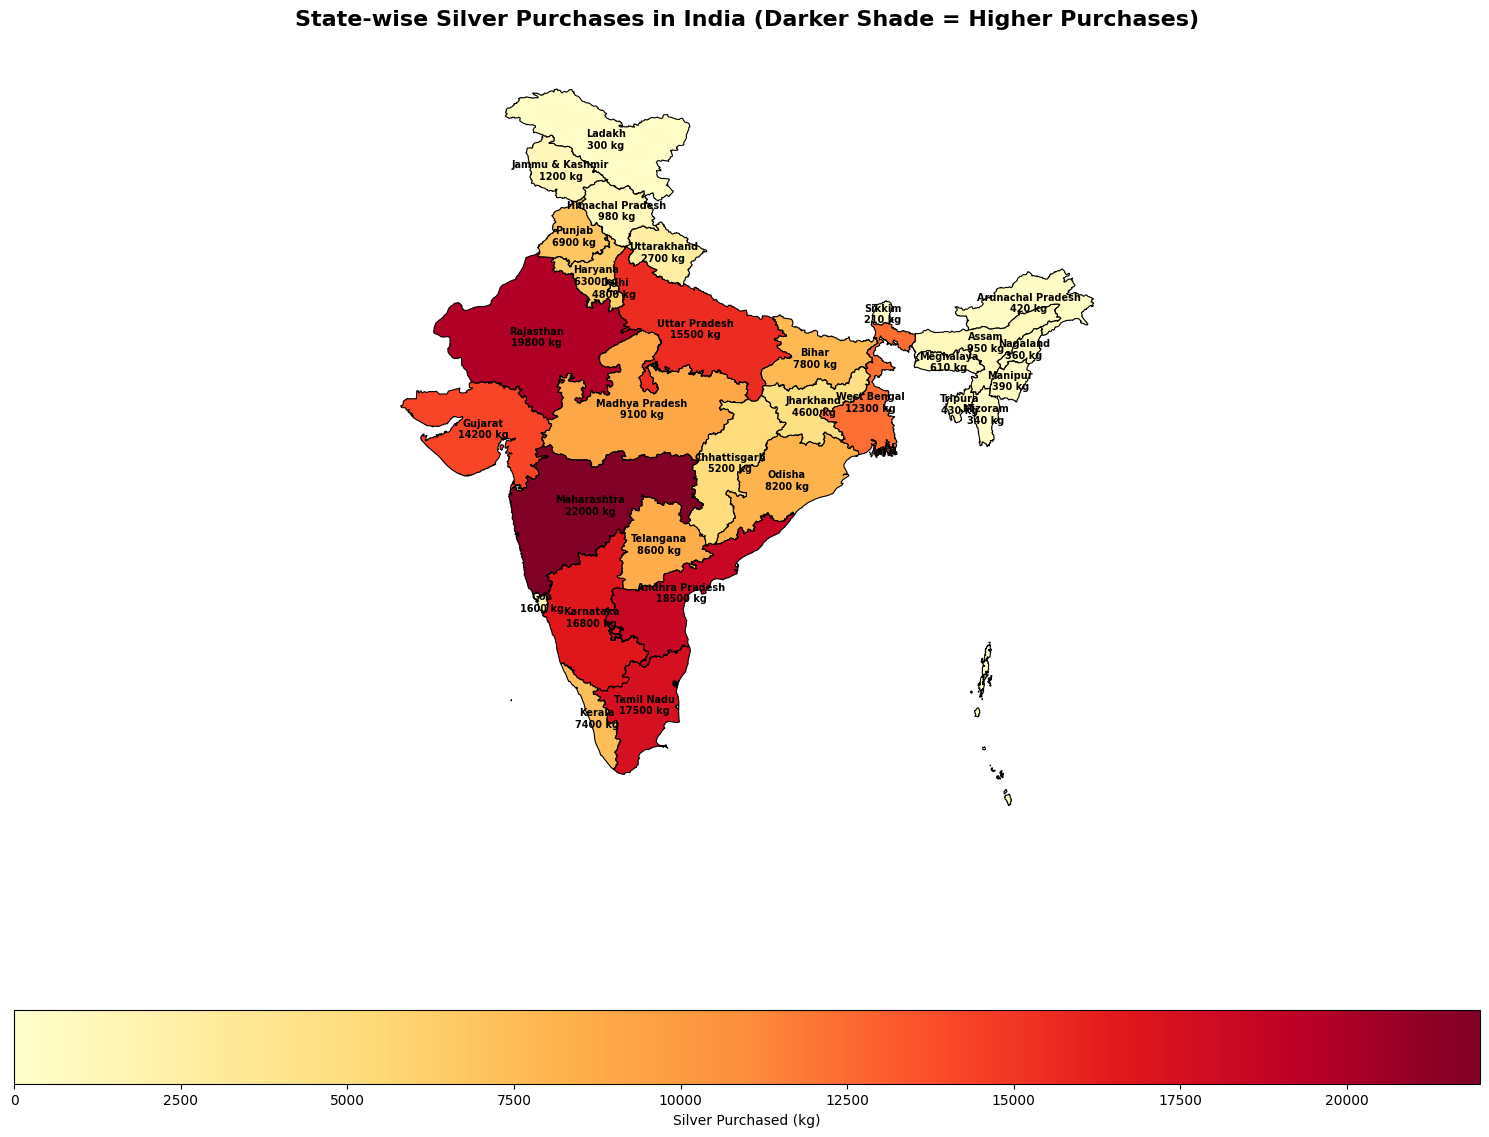

In [6]:
fig, ax = plt.subplots(figsize=(15, 12))

cmap = plt.cm.get_cmap('YlOrRd')
cmap.set_bad('white')

normalize = mcolors.Normalize(
    vmin=india_merged['Silver_Purchased_kg'].min(), 
    vmax=india_merged['Silver_Purchased_kg'].max()
)

india_merged.plot(
    ax=ax, 
    column='Silver_Purchased_kg', 
    cmap=cmap, 
    edgecolor='black', 
    linewidth=0.8, 
    legend=True,
    legend_kwds={'label': "Silver Purchased (kg)", 'orientation': "horizontal"}
)

for x, y, label, value in zip(
    india_merged.geometry.centroid.x, 
    india_merged.geometry.centroid.y, 
    india_merged['ST_NM'],
    india_merged['Silver_Purchased_kg']
):
    if value > 0:
        ax.text(x, y, f"{label}\n{value:.0f} kg", 
               fontsize=7, ha='center', va='center', weight='bold')

ax.set_title('State-wise Silver Purchases in India (Darker Shade = Higher Purchases)', 
            fontsize=16, weight='bold', pad=20)
ax.axis('off')

plt.tight_layout()
plt.show()